# Notebook to Explore and model the relationship between current weather and current power generation from one wind turbine 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

In [3]:
data = pd.read_csv('Wind_Dataset.csv')

In [4]:
data.head()

,Date/Time,LV ActivePower (kW),Wind Speed (m/s),Theoretical_Power_Curve (KWh),Wind Direction (°)
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645904,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


# Format datetime and clean up column names 

In [6]:
data.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction (°)":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)


data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['year'] = data['Date/Time'].dt.year 
data['month'] = data['Date/Time'].dt.month 
data['day'] = data['Date/Time'].dt.day

data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 
data.head()

# Calculate mean point estimates

In [8]:
def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [9]:

data['meanSpeed'] = data['WindSpeed(m/s)'].apply(mean_speed)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5


In [10]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [11]:
data["meanDirection"]=data["WindDirection"].apply(mean_direction)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645904,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5,240
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5,210
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5,240
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5,240


# Bin observations by cardinal direction

In [13]:

directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
    return directiondict[x]

In [14]:
data['windCDirection'] = data['meanDirection'].apply(wind_direction)


In [16]:
list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

for i in range(0,12):
    data1T_A=data[data["windCDirection"] == list_yon[i]]
    
    DepGroup_A = data1T_A.groupby("meanSpeed")
    data_T_A = DepGroup_A.mean()
    
    data_T_A.drop(columns = {"WindSpeed(m/s)",
                             "WindDirection",
                             "meanDirection"},
                  inplace = True)
    
    listTA_WS = data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"] = listTA_WS
    
    data_T_A = data_T_A[["WindSpeed(m/s)",
                         "ActivePower(kW)",
                         "TheoreticalPowerCurve(KWh)"]]
    
    data_T_A["Index"] = list(range(1,len(data_T_A.index)+1))

    data_T_A.set_index("Index", inplace = True)
    
    data_T_A = data_T_A.round({'ActivePower(kW)': 2,
                             'TheoreticalPowerCurve(KWh)': 2})
    
    data_T_A["count"] = [len(data1T_A["meanSpeed"][data1T_A["meanSpeed"] == x]) for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)


In [17]:
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]

list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that 

Text(0.04, 0.5, 'Power (kW)')

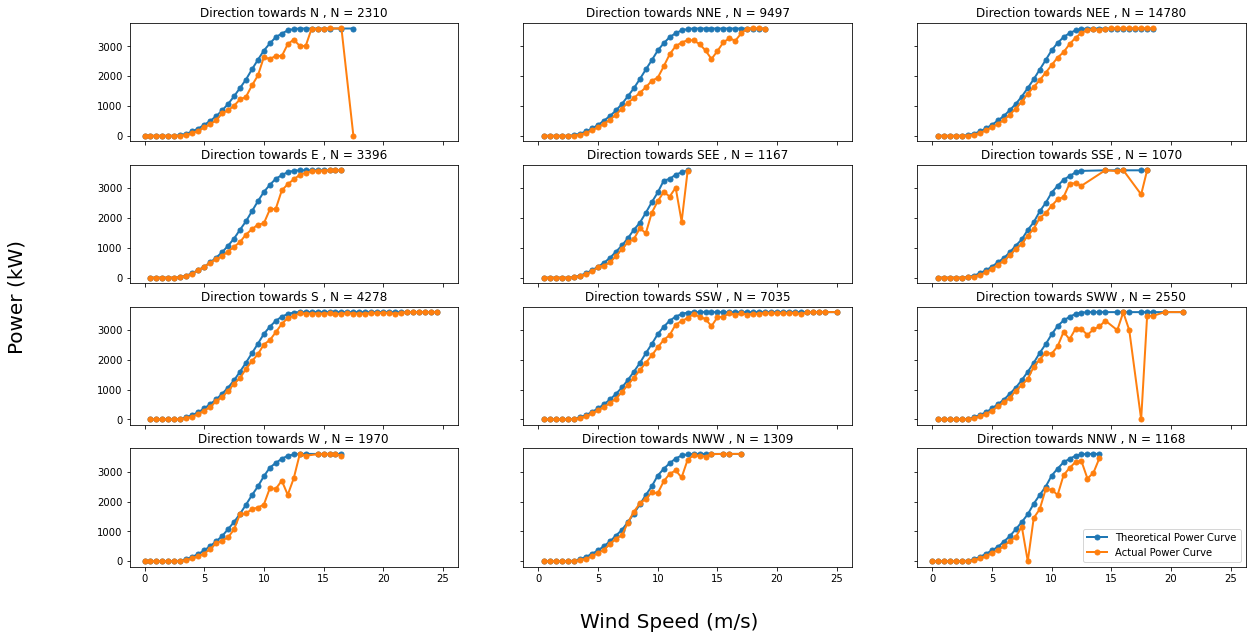

In [19]:
fig, axes = plt.subplots(4, 3, sharex=True, sharey=True, figsize=(20,10))
axes=axes.flatten()

def graph_T(i):
    axes[i].plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["TheoreticalPowerCurve(KWh)"],
             label = "Theoretical Power Curve",
             marker = "o", markersize = 5, linewidth = 2)
    
    axes[i].plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["ActivePower(kW)"],
             label = "Actual Power Curve",
             marker = "o", markersize = 5, linewidth = 2)
    

    axes[i].set_title("Direction towards {} , N = {}".format(list_tableName[i],list_table[i]['count'].sum()))
    plt.legend()
    #plt.show()
    #fig.savefig("{}_Powercurve.jpeg".format(list_tableName[i]))
    #plt.close(fig)
    
for i in range(0,12):
    graph_T(i)

fig.text(0.5, 0.04, 'Wind Speed (m/s)', ha='center',size = 20)
fig.text(0.04, 0.5, 'Power (kW)', va='center', rotation='vertical',size = 20)


# Train model

In [31]:
grouped['MeanResidual'] = grouped['ActivePower(kW)'] - grouped['EstimatedPowerRes']

In [32]:
grouped['MeanResidual'].sort_values().abs()

windCDirection
W      155.778007
NNE    117.430889
SEE    115.459600
N      108.432203
E       94.445359
SSE     91.597041
SWW     91.269181
NNW     84.492230
S       78.520480
NWW     63.071864
SSW     29.326902
NEE     71.132326
Name: MeanResidual, dtype: float64

In [33]:
from sklearn.svm import SVR

In [69]:
data_sub = data.sample(10000)

In [83]:
data_sub=data_sub[data_sub['meanSpeed']>4]

In [88]:
X = data[[ 'WindDirection', 'month', 'day', 'Hour', 'meanSpeed']]
y = data['ActivePower(kW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
model = SVR(kernel='rbf')
model = model.fit(X_train, y_train) 
pred_train_svr= model.predict(X_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_svr)))
print(r2_score(y_train, pred_train_svr))

pred_test_svr= model.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_svr))) 
print(r2_score(y_test, pred_test_svr))

data_sub['y_hat'] = model.predict(X)
plt.scatter(data_sub['y_hat'],data_sub['ActivePower(kW)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')

Training RMSE and R2 score:
1318.2453863614637
-0.006529112131095749
Testing RMSE and R2 score:
1305.9873405882547
0.00041543174604030675


# MVP Model : Random Forest

In [95]:
from sklearn.ensemble import RandomForestRegressor
X = data[[ 'WindDirection', 'month', 'day', 'Hour', 'meanSpeed']]
y = data['ActivePower(kW)']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [102]:
regr = RandomForestRegressor(max_depth=10, random_state=0)
regr.fit(X_train, y_train)
pred_train_rf= regr.predict(X_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_rf)))
print(r2_score(y_train, pred_train_rf))

pred_test_rf= regr.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_rf))) 
print(r2_score(y_test, pred_test_rf))

data['y_hat_rf'] = regr.predict(X)

Training RMSE and R2 score:
172.8772588369661
0.9826562934650557
Testing RMSE and R2 score:
216.42403777152884
0.9727825347275253


Text(0.5, 1.0, 'RF Predicted vs. Actual Plot')

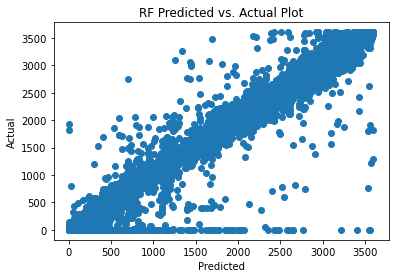

In [124]:
plt.scatter(pred_test_rf,y_test)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("RF Predicted vs. Actual Plot")

Text(0.5, 1.0, 'Wind Speed vs. Actual & Predicted Power')

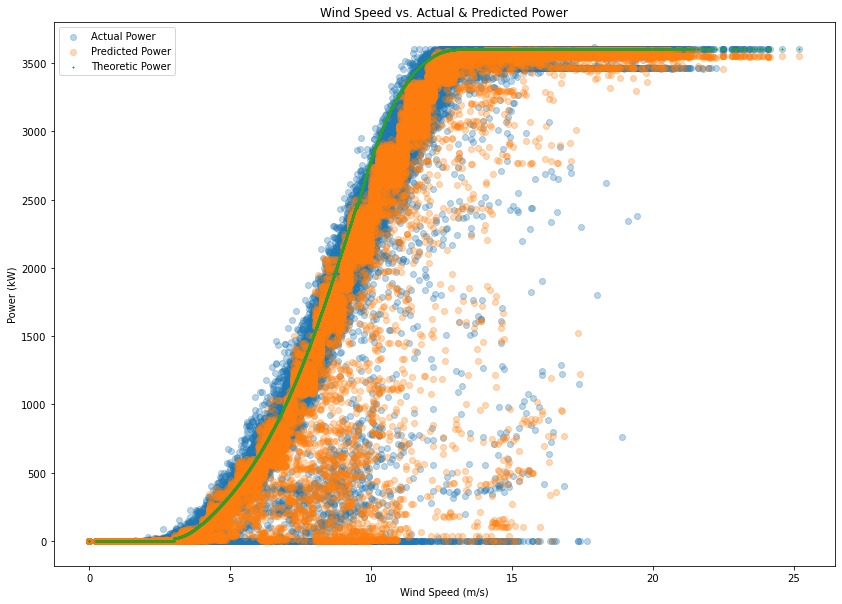

In [125]:
fig,ax = plt.subplots(figsize = [14,10])
plt.scatter(data['WindSpeed(m/s)'],data['ActivePower(kW)'],label = 'Actual Power',alpha = 0.3)
plt.scatter(data['WindSpeed(m/s)'],data['y_hat_rf'],label = 'Predicted Power',alpha = 0.3)

plt.scatter(data['WindSpeed(m/s)'],data['TheoreticalPowerCurve(KWh)'],label = 'Theoretic Power',marker='x',s=1)
plt.legend()
plt.xlabel("Wind Speed (m/s)")
plt.ylabel('Power (kW)')
plt.title("Wind Speed vs. Actual & Predicted Power")

# Aggregate to Daily resolution

In [126]:
data_daily = data.groupby(data['Date/Time'].dt.date).sum()

In [127]:
print(np.sqrt(mean_squared_error(data_daily['ActivePower(kW)'],data_daily['y_hat_rf']))) 
print(r2_score(data_daily['ActivePower(kW)'],data_daily['y_hat_rf']))

8357.18126238103
0.9970040000522258


In [137]:
data_daily['mean_windSpeed'] = data.groupby(data['Date/Time'].dt.date)['WindSpeed(m/s)'].mean()
data_daily['residual_rf'] = data_daily['y_hat_rf'] - data_daily['ActivePower(kW)']

Text(0.5, 1.0, ' Daily Aggregation Wind Speed vs. Actual & Predicted Power')

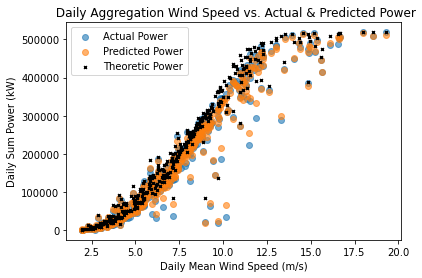

In [160]:
fig,ax = plt.subplots()
plt.scatter(data_daily['mean_windSpeed'],data_daily['ActivePower(kW)'],label = 'Actual Power',alpha = 0.6)
plt.scatter(data_daily['mean_windSpeed'],data_daily['y_hat_rf'],label = 'Predicted Power',alpha = 0.6)

plt.scatter(data_daily['mean_windSpeed'],data_daily['TheoreticalPowerCurve(KWh)'],label = 'Theoretic Power',marker='x',s=8, color = 'black')
plt.legend()
plt.xlabel("Daily Mean Wind Speed (m/s)")
plt.ylabel('Daily Sum Power (kW)')
plt.title(" Daily Aggregation Wind Speed vs. Actual & Predicted Power")

In [143]:
data_daily['percent_error'] = (data_daily['residual_rf']/data_daily['ActivePower(kW)'])*100

In [150]:
data_daily['zero'] = 0

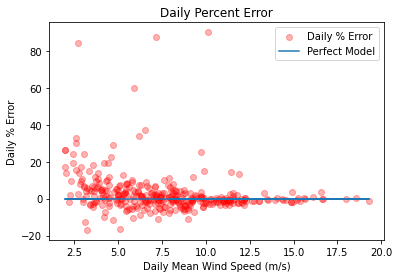

In [162]:
plt.scatter(data_daily['mean_windSpeed'],data_daily['percent_error'],c = 'red',label = 'Daily % Error',alpha = 0.3)
plt.plot(data_daily['mean_windSpeed'],data_daily['zero'],label = 'Perfect Model')
plt.xlabel("Daily Mean Wind Speed (m/s)")
plt.ylabel('Daily % Error')
plt.title('Daily Percent Error')
plt.legend()

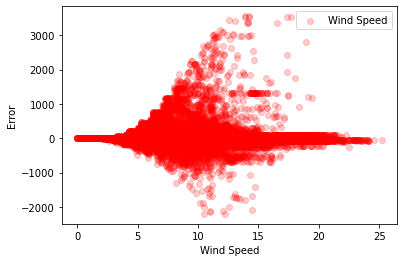

In [100]:
plt.scatter(data['WindSpeed(m/s)'],data['residual_rf'],c = 'red',label = 'Wind Speed',alpha = 0.2)
plt.xlabel("Wind Speed")
plt.ylabel('Error')
plt.legend()

In [123]:
importances = regr.feature_importances_
std = np.std([tree.feature_importances_ for tree in regr.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. meanSpeed (0.926079)
2. day (0.027820)
3. WindDirection (0.021055)
4. month (0.017384)
5. Hour (0.007662)
